In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [30]:
train=pd.read_csv("Project Dataset - Sheet1.csv")

In [31]:
train.head()

,Name,Gender,State,Region,Father's Income,Mother's income,Bank Name,Education Category,Education level,Private/Government colleges,Total loan amount,Loan time period,Repaid by own or by parents,Secured/unsecured loan,Loan repaid in given time,% of loan repaid in the decided time period,Current satus of employment
0,LP001002,Male,west bengal,Urban,5849,0.0,Commercial-private bank,Arts,junior college,private,NaN,360.0,By parents,Unsecured,Y,100.0,No
1,LP001003,Male,MadhyaPradesh,Rural,4583,1508.0,Co-operative bank,Management /Finance,under graduation,private,128.0,360.0,By own,Secured,N,50.0,No
2,LP001005,Male,MadhyaPradesh,Urban,3000,0.0,NBFC,Technical,post graduation,government,66.0,360.0,By parents,Secured,Y,100.0,Yes
3,LP001006,Male,Assam,Urban,2583,2358.0,Commercial -gov-Bank,Medical,doctorate,private,120.0,360.0,By own,Unsecured,Y,100.0,No
4,LP001008,Male,Uttarakhand,Rural,6000,0.0,Regional Rural Banks,Pure sciences,post graduation,government,141.0,360.0,By parents,Unsecured,Y,100.0,No


In [32]:

train_original = train.copy()

In [33]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Name                                         598 non-null    object 
 1   Gender                                       585 non-null    object 
 2   State                                        597 non-null    object 
 3   Region                                       598 non-null    object 
 4   Father's Income                              598 non-null    int64  
 5   Mother's income                              598 non-null    float64
 6   Bank Name                                    590 non-null    object 
 7   Education Category                           598 non-null    object 
 8   Education level                              588 non-null    object 
 9   Private/Government colleges                  590 non-null    object 
 10  To

In [15]:
train.shape()

TypeError: 'tuple' object is not callable

In [16]:
train["Loan repaid in given time"].count()  #size of Loan_Status--gives a non null count of that feature

598

In [17]:
train["Loan repaid in given time"].value_counts() #returns number of yes and no


Y    409
N    189
Name: Loan repaid in given time, dtype: int64

In [18]:
train["Loan repaid in given time"].value_counts(normalize=True)*100 #returns percentage of yes and no

Y    68.394649
N    31.605351
Name: Loan repaid in given time, dtype: float64

<AxesSubplot:title={'center':'Loan_Status'}>

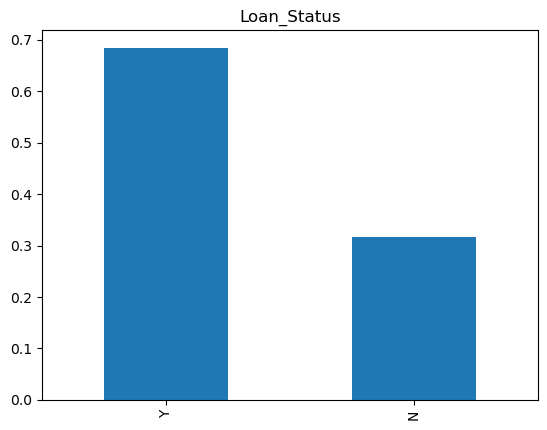

In [19]:
train["Loan repaid in given time"].value_counts(normalize=True).plot.bar(title = 'Loan_Status') #this gives a bar graph

In [22]:
train["Gender"].count()  #size of Gender



585

In [23]:
train["Gender"].value_counts() #returns number of males and females

Male      477
Female    108
Name: Gender, dtype: int64

In [24]:
train["Gender"].value_counts(normalize=True)*100 #returns percentage of male and female

Male      81.538462
Female    18.461538
Name: Gender, dtype: float64

<AxesSubplot:title={'center':'Gender'}>

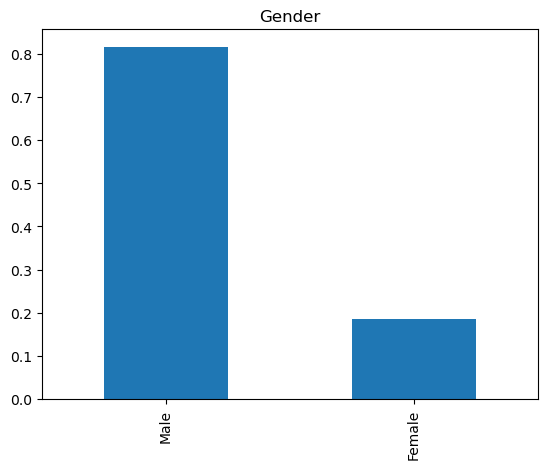

In [25]:
train["Gender"].value_counts(normalize=True).plot.bar(title = 'Gender')

In [26]:
train["State"].value_counts(normalize=True)*100

Gujarat           9.547739
Punjab            8.877722
Kerala            8.710218
Andhra Pradesh    8.542714
Delhi             8.375209
TamilNadu         8.207705
Maharshtra        7.537688
UP                7.537688
Rajasthan         7.370184
Karnataka         7.202680
MadhyaPradesh     6.867672
Uttarakhand       5.527638
west bengal       3.852596
Assam             1.842546
Name: State, dtype: float64

<AxesSubplot:title={'center':'State'}>

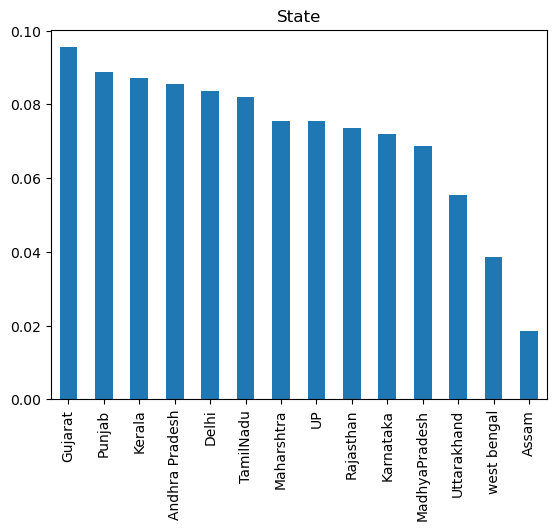

In [34]:
train["State"].value_counts(normalize=True).plot.bar(title = 'State')

<AxesSubplot:title={'center':'Region'}>

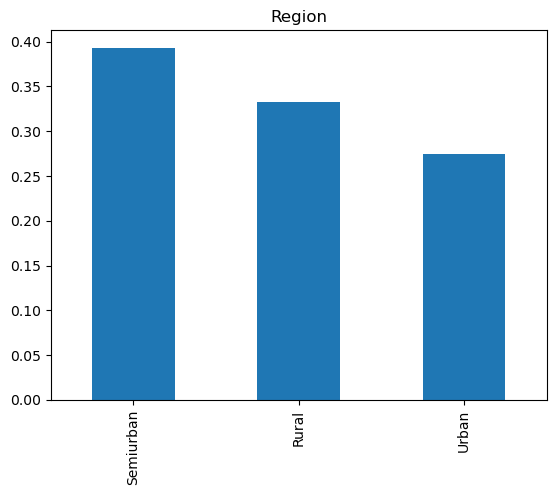

In [35]:
train["Region"].value_counts(normalize=True).plot.bar(title = 'Region')

<AxesSubplot:title={'center':'Type of Bank'}>

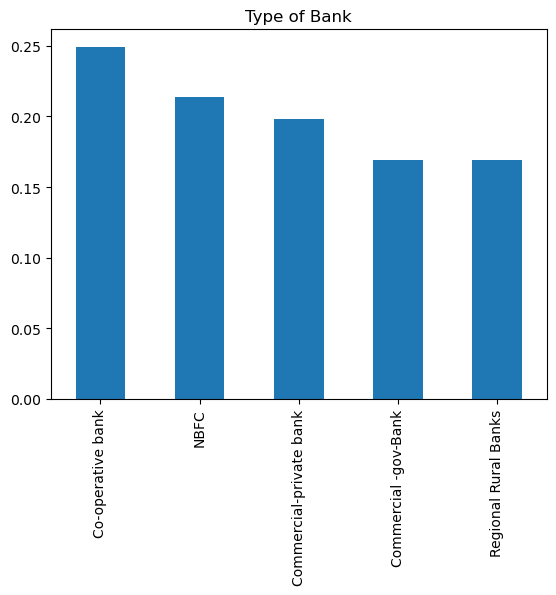

In [36]:
train["Bank Name"].value_counts(normalize=True).plot.bar(title = 'Type of Bank')

<AxesSubplot:title={'center':'Education Category'}>

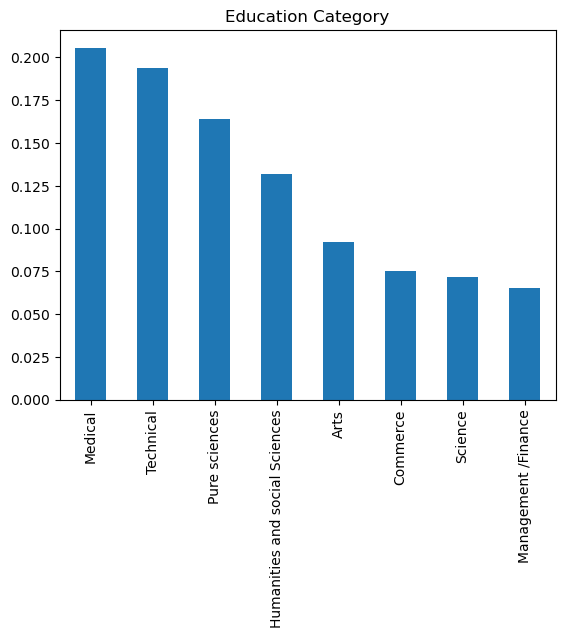

In [37]:
train["Education Category"].value_counts(normalize=True).plot.bar(title = 'Education Category')

<AxesSubplot:title={'center':'Education level'}>

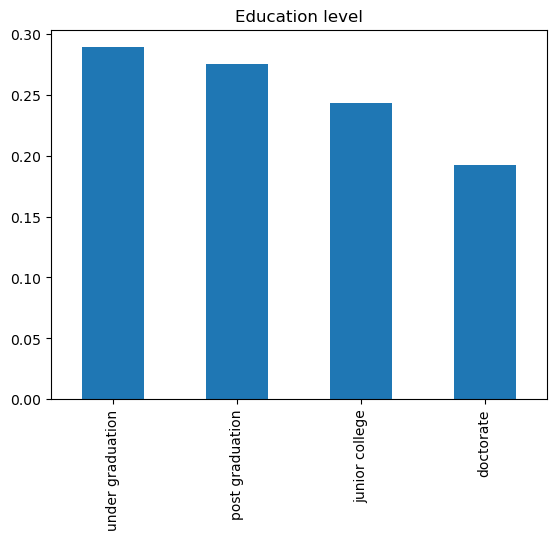

In [38]:
train["Education level"].value_counts(normalize=True).plot.bar(title = 'Education level')

<AxesSubplot:title={'center':'Type of colleges'}>

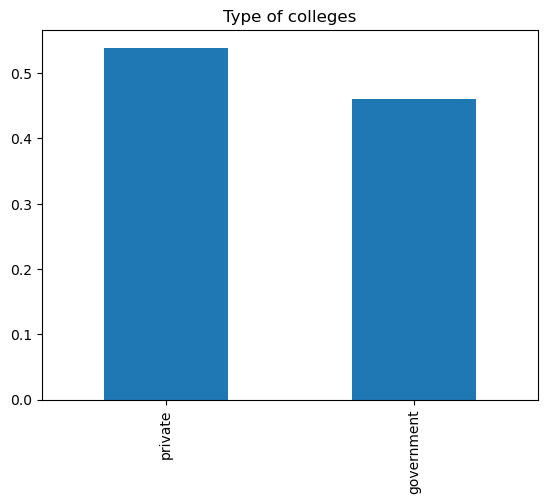

In [39]:
train["Private/Government colleges"].value_counts(normalize=True).plot.bar(title = 'Type of colleges')

<AxesSubplot:title={'center':'Repaid by own or by parents'}>

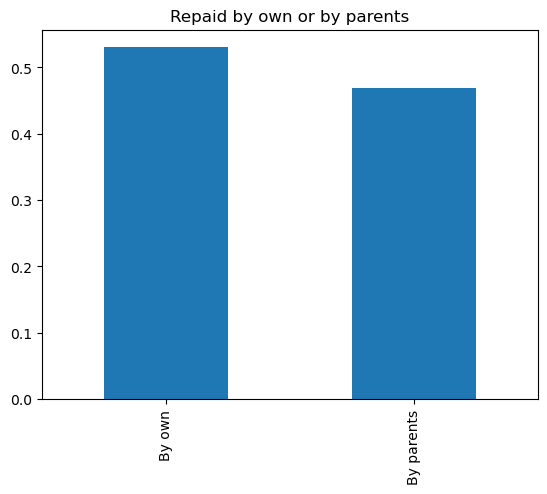

In [40]:
train["Repaid by own or by parents"].value_counts(normalize=True).plot.bar(title = 'Repaid by own or by parents')

<AxesSubplot:title={'center':'Secured/unsecured loan'}>

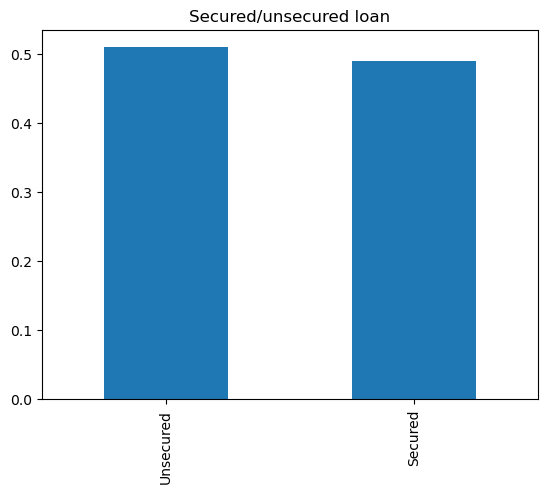

In [41]:
train["Secured/unsecured loan"].value_counts(normalize=True).plot.bar(title = 'Secured/unsecured loan')

<AxesSubplot:title={'center':'Current satus of employment'}>

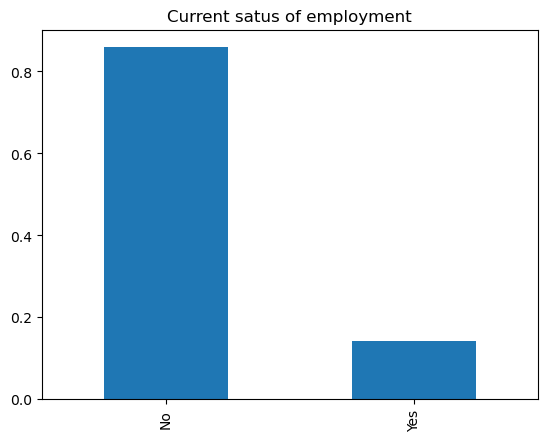

In [42]:
train["Current satus of employment"].value_counts(normalize=True).plot.bar(title = 'Current satus of employment')

<AxesSubplot:>

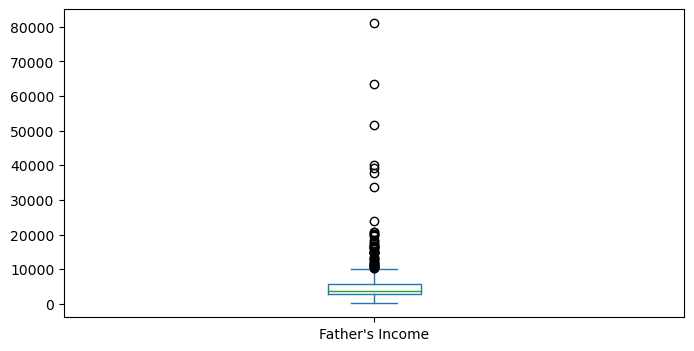

In [51]:
train["Father's Income"].plot.box(figsize=(8,4))

<AxesSubplot:>

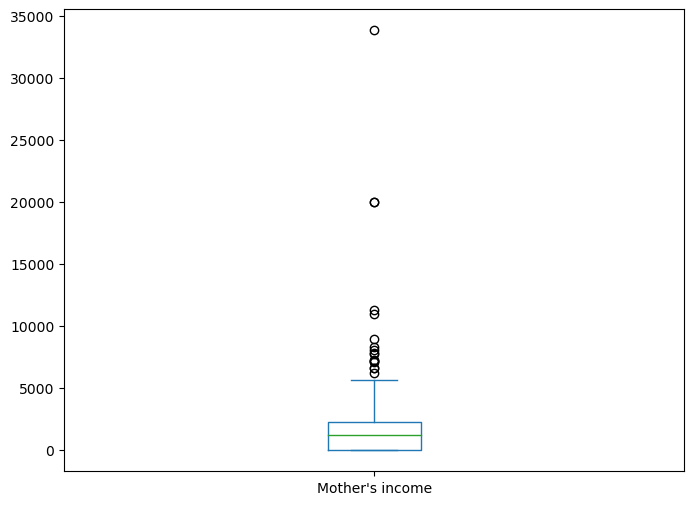

In [72]:
train["Mother's income"].plot.box(figsize=(8,6))


<AxesSubplot:>

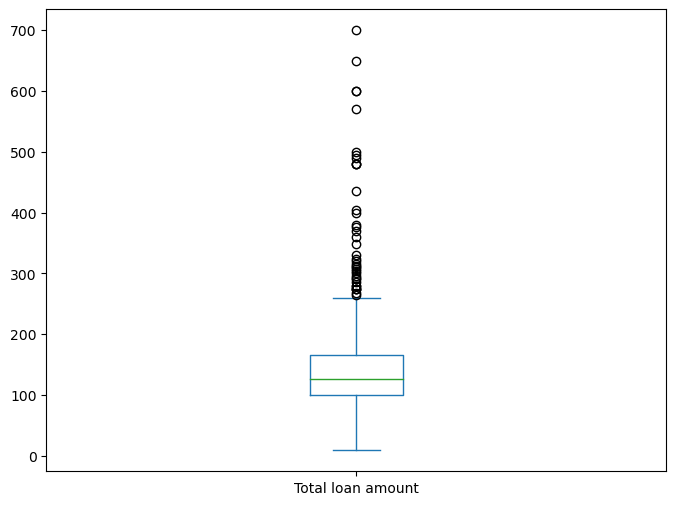

In [71]:
train["Total loan amount"].plot.box(figsize=(8,6))

<AxesSubplot:>

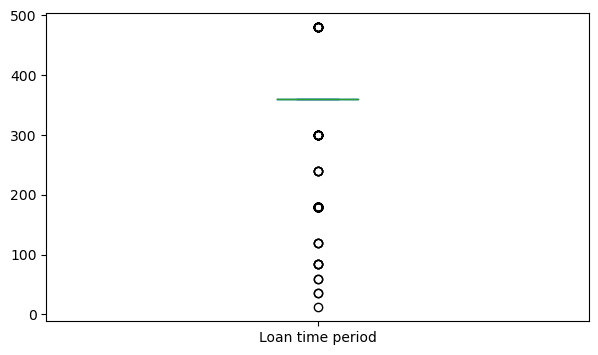

In [79]:
train["Loan time period"].plot.box(figsize=(7,4))

<AxesSubplot:>

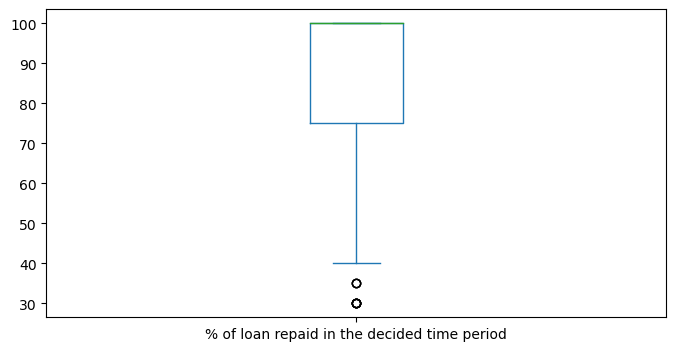

In [78]:
train["% of loan repaid in the decided time period"].plot.box(figsize=(8,5))

AxesSubplot(0.125,0.11;0.775x0.77)


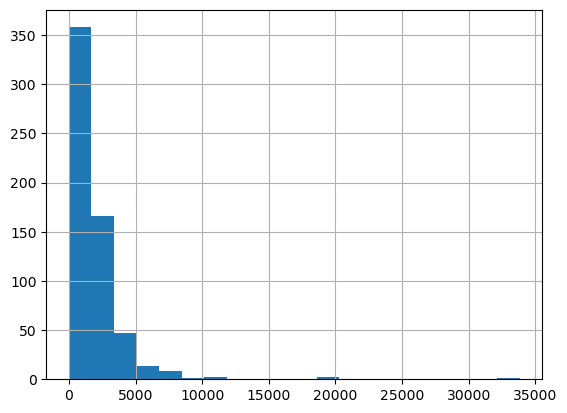

In [61]:
print(train["Mother's income"].hist(bins=20))

AxesSubplot(0.125,0.11;0.775x0.77)


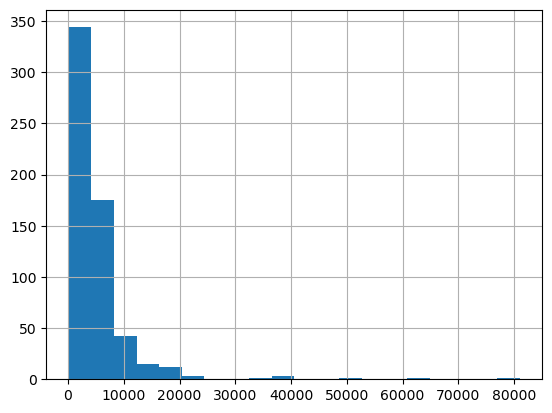

In [62]:
print(train["Father's Income"].hist(bins=20))

AxesSubplot(0.125,0.11;0.775x0.77)


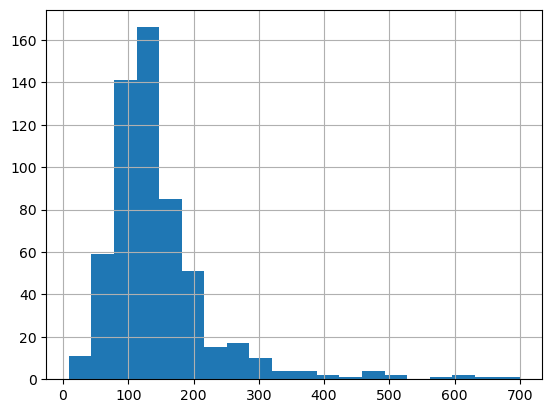

In [81]:
print(train["Total loan amount"].hist(bins=20))

AxesSubplot(0.125,0.11;0.775x0.77)


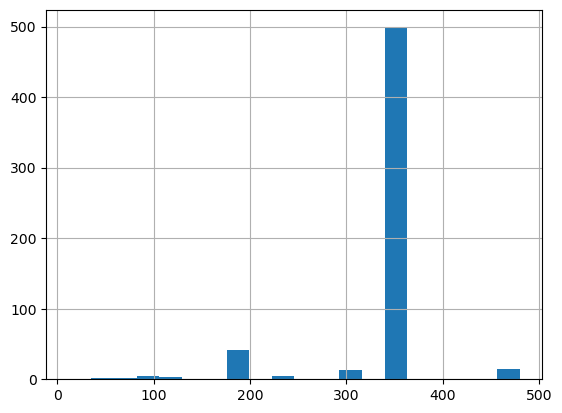

In [82]:
print(train["Loan time period"].hist(bins=20))

AxesSubplot(0.125,0.11;0.775x0.77)


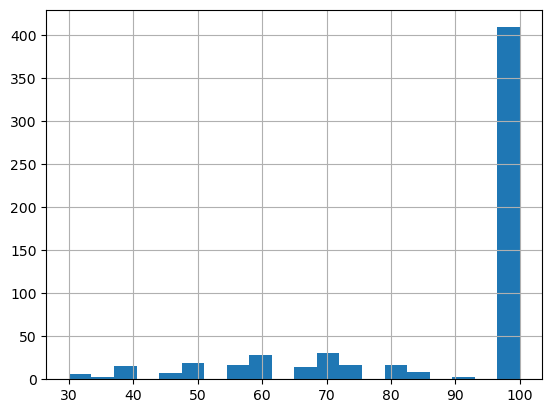

In [83]:
print(train["% of loan repaid in the decided time period"].hist(bins=20))

AxesSubplot(0.1,0.15;0.8x0.75)


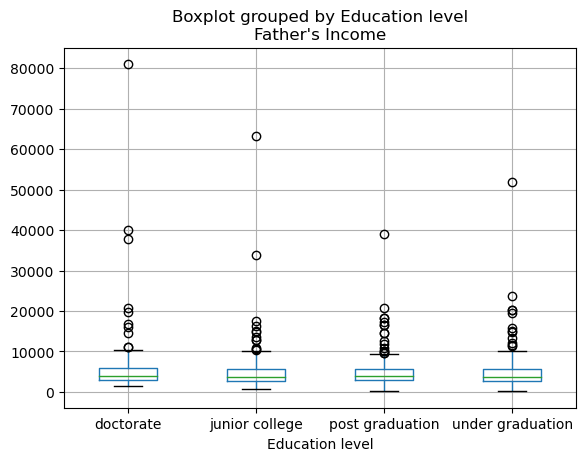

In [63]:
print(train.boxplot(column="Father's Income",by="Education level" ))

AxesSubplot(0.1,0.15;0.8x0.75)


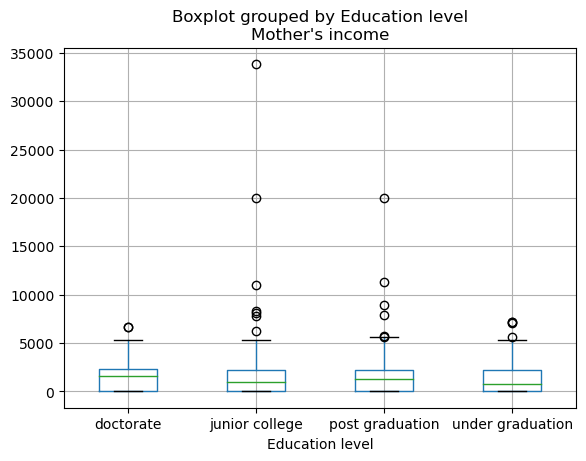

In [68]:
print(train.boxplot(column="Mother's income",by="Education level" ))

AxesSubplot(0.1,0.15;0.8x0.75)


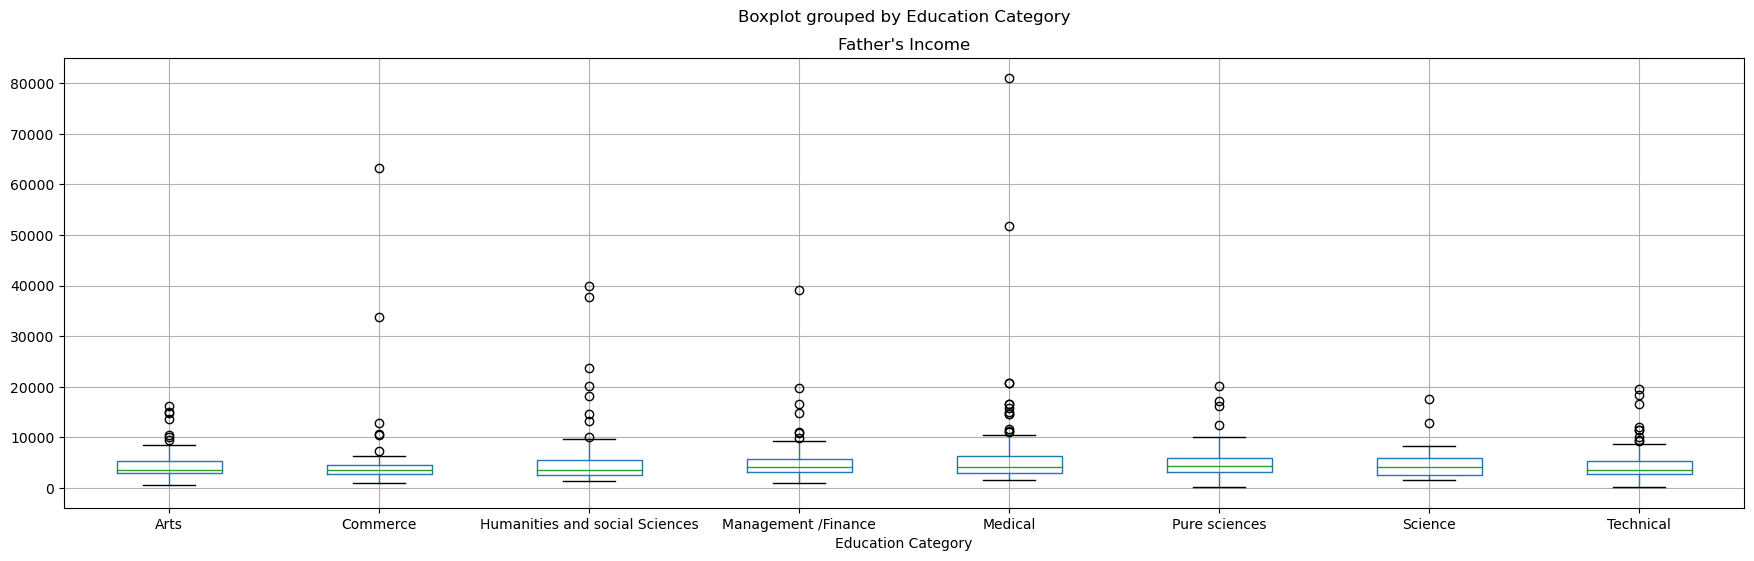

In [67]:
print(train.boxplot(column="Father's Income",by="Education Category",figsize=(21,6) ))

AxesSubplot(0.1,0.15;0.8x0.75)


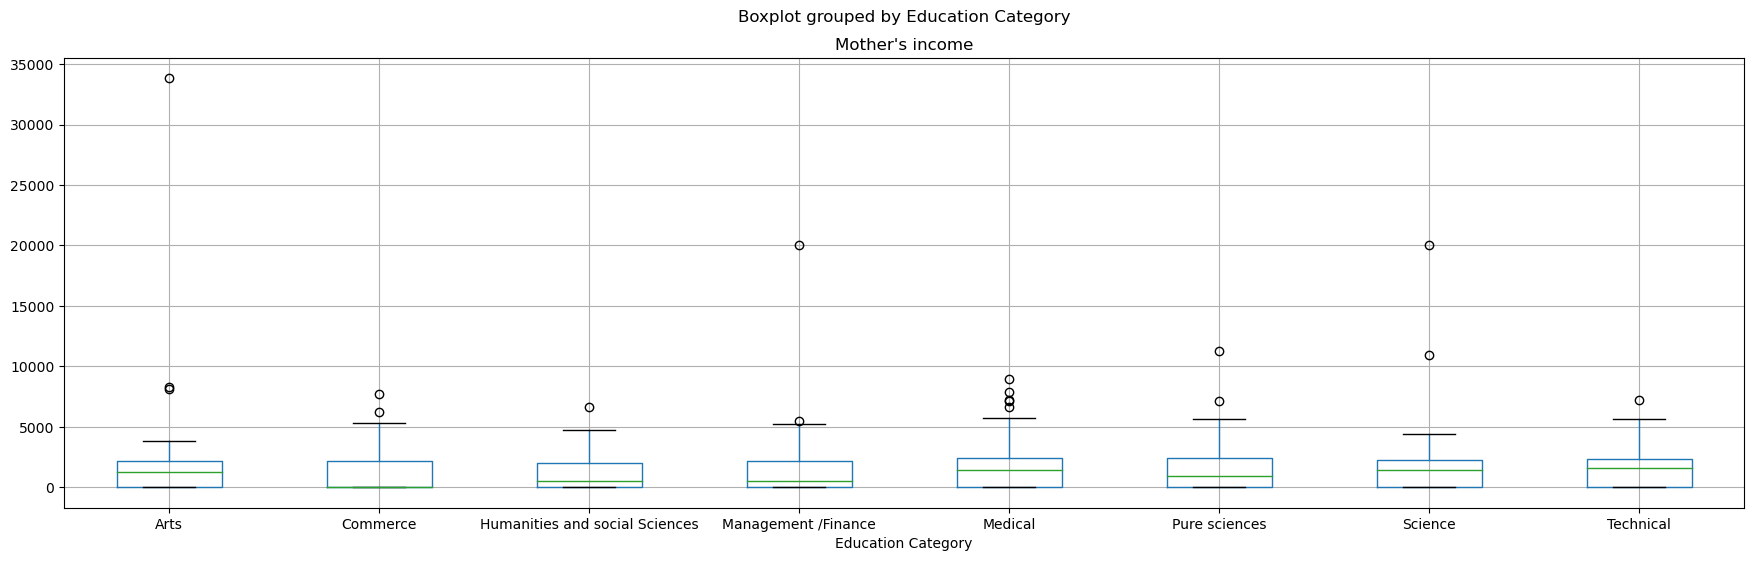

In [69]:
print(train.boxplot(column="Mother's income",by="Education Category",figsize=(21,6) ))